In [1]:
'''
Hola, lean esto antes de empezar:
bueno lo que hice aqui fue hacer una comparacion entre la demanda electrica nacional
y la temperatura promedio. 
lo que hice fue aisalr los datos y graficar, y buscar una tendencia lineal en los datos

nat_demand: Carga eléctrica nacional
T2M: Temperatura a 2 metros
QV2M: Humedad relativa a 2 metros
TQL: Precipitación líquida
W2M: Velocidad del viento a 2 metros

parque eolico, vel viento

'''
import pandas as pd
df = pd.read_csv('continuous dataset.csv')
df
#aqui puse para visualizar el Df

,datetime,nat_demand,T2M_toc,QV2M_toc,TQL_toc,W2M_toc,T2M_san,QV2M_san,TQL_san,W2M_san,T2M_dav,QV2M_dav,TQL_dav,W2M_dav,Holiday_ID,holiday,school
0,2015-01-03 01:00:00,970.3450,25.865259,0.018576,0.016174,21.850546,23.482446,0.017272,0.001855,10.328949,22.662134,0.016562,0.096100,5.364148,0,0,0
1,2015-01-03 02:00:00,912.1755,25.899255,0.018653,0.016418,22.166944,23.399255,0.017265,0.001327,10.681517,22.578943,0.016509,0.087646,5.572471,0,0,0
2,2015-01-03 03:00:00,900.2688,25.937280,0.018768,0.015480,22.454911,23.343530,0.017211,0.001428,10.874924,22.531030,0.016479,0.078735,5.871184,0,0,0
3,2015-01-03 04:00:00,889.9538,25.957544,0.018890,0.016273,22.110481,23.238794,0.017128,0.002599,10.518620,22.512231,0.016487,0.068390,5.883621,0,0,0
4,2015-01-03 05:00:00,893.6865,25.973840,0.018981,0.017281,21.186089,23.075403,0.017059,0.001729,9.733589,22.481653,0.016456,0.064362,5.611724,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48043,2020-06-26 20:00:00,1128.5592,27.246545,0.020303,0.055511,9.289304,25.715295,0.019746,0.121552,1.990773,23.746545,0.018381,0.150879,2.444658,0,0,1
48044,2020-06-26 21:00:00,1112.7488,27.099573,0.020395,0.053848,9.837504,25.552698,0.019632,0.153870,2.094459,23.693323,0.018320,0.156311,2.515814,0,0,1
48045,2020-06-26 22:00:00,1081.5680,26.971155,0.020448,0.057251,10.262464,25.393030,0.019518,0.144531,2.396369,23.658655,0.018327,0.153259,2.800717,0,0,1
48046,2020-06-26 23:00:00,1041.6240,26.867487,0.020464,0.064178,10.326567,25.258112,0.019403,0.108063,2.720871,23.601862,0.018358,0.152771,3.138132,0,0,1


In [2]:
df['T2M_toc'] = df['T2M_toc'].round(1)
df['T2M_san'] = df['T2M_san'].round(1)
df['T2M_dav'] = df['T2M_dav'].round(1)
df_temp = ['datetime','nat_demand','T2M_toc','T2M_san','T2M_dav']
df[df_temp]
# con esto redondie las temperaturas para que sean graficables, y cree un nuevo dataframe con las temperaturas aisladas

,datetime,nat_demand,T2M_toc,T2M_san,T2M_dav
0,2015-01-03 01:00:00,970.3450,25.9,23.5,22.7
1,2015-01-03 02:00:00,912.1755,25.9,23.4,22.6
2,2015-01-03 03:00:00,900.2688,25.9,23.3,22.5
3,2015-01-03 04:00:00,889.9538,26.0,23.2,22.5
4,2015-01-03 05:00:00,893.6865,26.0,23.1,22.5
...,...,...,...,...,...
48043,2020-06-26 20:00:00,1128.5592,27.2,25.7,23.7
48044,2020-06-26 21:00:00,1112.7488,27.1,25.6,23.7
48045,2020-06-26 22:00:00,1081.5680,27.0,25.4,23.7
48046,2020-06-26 23:00:00,1041.6240,26.9,25.3,23.6


In [3]:
df2 = df[df_temp].copy()
T2M_prom = df2[['T2M_toc','T2M_san','T2M_dav']].mean(axis = 1).round(1)
df2['T2M_prom'] = T2M_prom
df2.to_csv('demand_tprom.csv', index = False)
df2
# aqui lo que hice fue leer el nuevo df, sacar el promedio de temperaturas en las provincias y mostrar el df

,datetime,nat_demand,T2M_toc,T2M_san,T2M_dav,T2M_prom
0,2015-01-03 01:00:00,970.3450,25.9,23.5,22.7,24.0
1,2015-01-03 02:00:00,912.1755,25.9,23.4,22.6,24.0
2,2015-01-03 03:00:00,900.2688,25.9,23.3,22.5,23.9
3,2015-01-03 04:00:00,889.9538,26.0,23.2,22.5,23.9
4,2015-01-03 05:00:00,893.6865,26.0,23.1,22.5,23.9
...,...,...,...,...,...,...
48043,2020-06-26 20:00:00,1128.5592,27.2,25.7,23.7,25.5
48044,2020-06-26 21:00:00,1112.7488,27.1,25.6,23.7,25.5
48045,2020-06-26 22:00:00,1081.5680,27.0,25.4,23.7,25.4
48046,2020-06-26 23:00:00,1041.6240,26.9,25.3,23.6,25.3


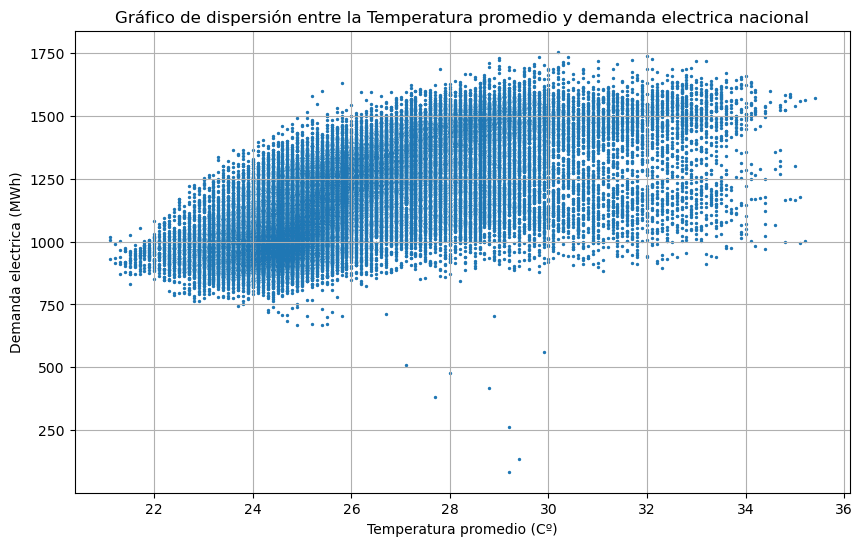

In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(df2['T2M_prom'], df['nat_demand'], alpha=1, s =2)  # alpha controla la opacidad de los puntos
plt.title('Gráfico de dispersión entre la {} y {}'.format('Temperatura promedio','demanda electrica nacional'))
plt.xlabel('Temperatura promedio (Cº)')
plt.ylabel('Demanda electrica (MWh)')
plt.grid(True)
plt.show()
# aqui hice el grafico

In [5]:
import numpy as np
from sklearn.linear_model import LinearRegression

x = df2['T2M_prom'].values.reshape(-1, 1) 
y = df2['nat_demand'].values  

model = LinearRegression()
model.fit(x, y)

print('Intercept:', model.intercept_)
print('Slope:', model.coef_[0])


y_pred = model.predict(x)

#con esto se crea la regresion lineal 

Intercept: -242.88526515221884
Slope: 54.11574947367533


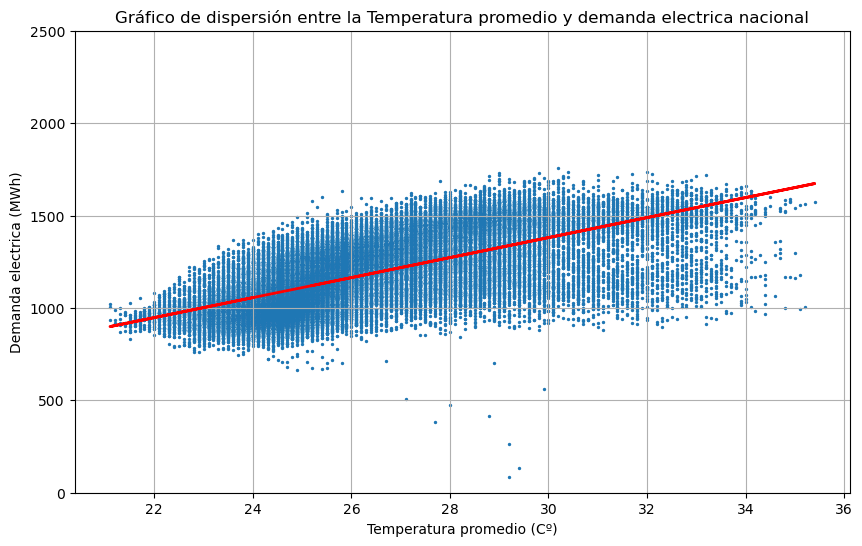

In [6]:
plt.figure(figsize=(10, 6))
plt.scatter(df2['T2M_prom'], df['nat_demand'], alpha=1, s =2)  
plt.plot(x, y_pred, color='red', linewidth=2, label='Línea de regresión') 
plt.ylim(0, 2500)
plt.title('Gráfico de dispersión entre la {} y {}'.format('Temperatura promedio','demanda electrica nacional'))
plt.xlabel('Temperatura promedio (Cº)')
plt.ylabel('Demanda electrica (MWh)')
plt.grid(True)
plt.show()
#hice otro grafico añadiendo la regresion